In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from eeg_prep.utils import compute_samplepoints
from connection_complexity.data.raw_data.EDF.edf_helpers import read_edf

import mne
import matplotlib.pyplot as plt
import numpy as np
from eeg_prep.utils import compute_samplepoints
from connection_complexity.data.raw_data.EDF.edf_helpers import read_edf


In [13]:
# edf = read_edf("f:\\data\\iEEG\\raw_ieeg\\baseline_patients\\baseline_edfs\\034_Baseline.EDF")
# raw= mne.io.read_raw_edf("f:\\data\\iEEG\\raw_ieeg\\baseline_patients\\baseline_edfs\\034_Baseline.EDF", preload=True)3


# edf = read_edf("f:\\data\\iEEG\\raw_ieeg\\baseline_patients\\baseline_edfs\\034_Baseline.EDF")
raw= mne.io.read_raw_edf("/media/dan/Data/data/iEEG/raw_ieeg/baseline_patients/baseline_edfs/034_Baseline.EDF", preload=True)

raw_unfiltered = raw.copy()
# initialize nyquist and line frequency

Extracting EDF parameters from /media/dan/Data/data/iEEG/raw_ieeg/baseline_patients/baseline_edfs/034_Baseline.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 621055  =      0.000 ...   303.250 secs...


In [14]:
# initialize nyquist and line frequency
nyq_freq = raw.info["sfreq"] // 2 - 1
line_freq = 60

# 1. filter data - bandpass [0.5, Nyquist]
l_freq = 0.5
h_freq = min(nyq_freq, 300)

# perform band-pass filtering
raw = raw.filter(l_freq=l_freq, h_freq=h_freq)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 300.00 Hz
- Upper transition bandwidth: 75.00 Hz (-6 dB cutoff frequency: 337.50 Hz)
- Filter length: 13517 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.9s


In [15]:
ch_names = [x for x in raw.ch_names if "EEG " in x]
ch_names[0]

'EEG Wa1'

In [22]:
data = raw.get_data(picks=ch_names)*1e6
data_unfiltered = raw_unfiltered.get_data(picks=ch_names) 

In [18]:
data.shape

(97, 621056)

In [25]:
data[0, :10]

array([ 1.18584613e-14, -3.50008452e+00, -6.16566053e+00, -7.44330956e+00,
       -7.23746478e+00, -5.88257712e+00, -3.91156467e+00, -1.71494293e+00,
        6.93046917e-01,  3.61317806e+00])

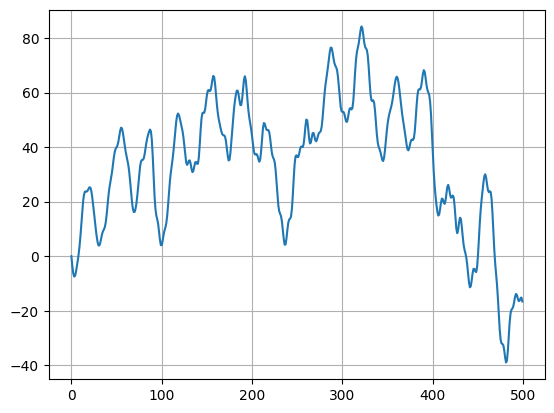

In [24]:
plt.plot(data[0, :500])
plt.grid()
# plt.plot(data_unfiltered[0, :500])

In [74]:
window_indexs = compute_samplepoints(1024, 1, edf.n_times)

In [75]:
window_indexs

array([[     0,   1024],
       [     1,   1025],
       [     2,   1026],
       ...,
       [620030, 621054],
       [620031, 621055],
       [620032, 621056]])

In [79]:
d = data[:, window_indexs[0, 0] : window_indexs[0, 1]]
d

array([[  27.51471733,   22.19786374,   22.99539178, ...,  -22.7295491 ,
         -25.38797589,  -20.60280766],
       [  19.53943694,   11.29831388,   12.89336995, ...,  -41.07269398,
         -45.59201953,  -40.00932326],
       [-200.57830167, -201.90751507, -198.18571756, ...,  -59.94752422,
         -63.40347906,  -58.88415351],
       ...,
       [  78.29066911,   71.37875944,   71.9104448 , ...,   20.0711223 ,
          17.14685283,   17.41269551],
       [ 104.3432517 ,   95.83628595,   99.29224079, ...,  -42.1360647 ,
         -42.1360647 ,  -37.08505379],
       [  84.13920806,   79.08819715,   81.74662394, ...,   -1.9938201 ,
          -5.18393225,   -0.93044938]])

In [80]:
x = d[:, :-1]
y = d[:, 1:]

A = y @ np.linalg.pinv(x)

A.shape



(97, 97)

In [81]:
A[:4, :4]


array([[ 0.8583202 , -0.07396652,  0.02394525, -0.0405656 ],
       [ 0.33326886,  0.3250967 ,  0.0051953 , -0.02366979],
       [ 0.11154527, -0.18472835,  0.995222  , -0.03762345],
       [ 0.14534471, -0.20986613,  0.06618677,  0.85583542]])